In [ ]:
import os


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df_iris=pd.read_csv('/content/IRIS.csv')

In [ ]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df_iris.shape

(150, 5)

In [ ]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

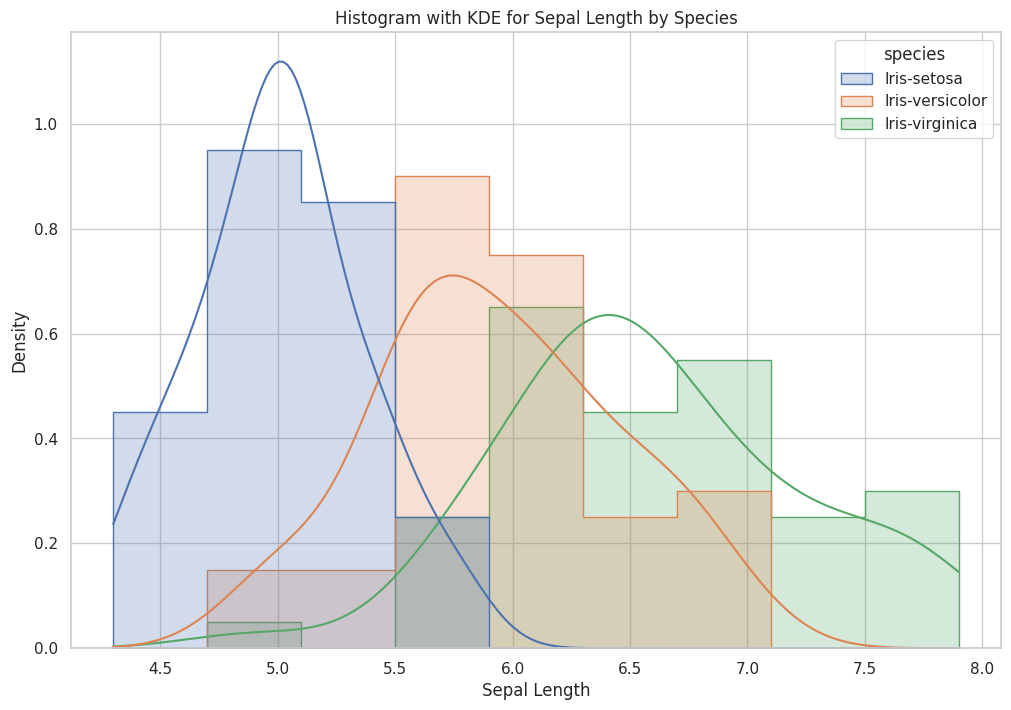

In [ ]:
# Box Plot for Sepal Width by Species
box_plot = px.box(df_iris, x="species", y="sepal_width", points="all", title="Box Plot of Sepal Width by Species")
box_plot.show()

# Grouped Bar Graph for Sepal and Petal Measurements by Species
bar_graph = px.bar(df_iris, x="species", y=["sepal_length", "sepal_width", "petal_length", "petal_width"],
                   barmode="group", title="Grouped Bar Graph for Sepal and Petal Measurements by Species")
bar_graph.show()

# Histogram with KDE for Sepal Length by Species using Seaborn
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Plot histogram with kernel density estimate (KDE)
sns.histplot(df_iris, x="sepal_length", hue="species", element="step", stat="density", common_norm=False, kde=True)

# Add title and labels
plt.title("Histogram with KDE for Sepal Length by Species")
plt.xlabel("Sepal Length")
plt.ylabel("Density")

# Show the plot
plt.show()

In [ ]:
# Train the KNN model
x = df_iris.drop("species", axis=1)
y = df_iris["species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=1)

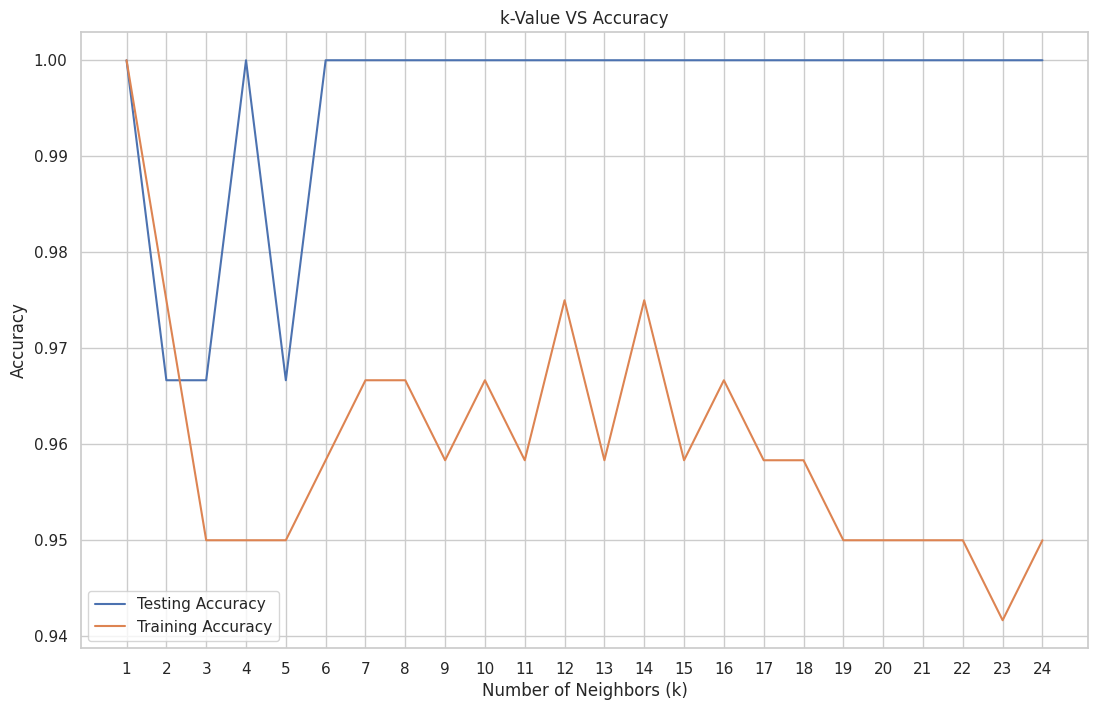

Best accuracy is 1.0 with k = 1


In [ ]:
# Model Complexity Plot
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for k in neig:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13, 8])
plt.plot(neig, test_accuracy, label='Testing Accuracy')
plt.plot(neig, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title("k-Value VS Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(neig)
plt.show()

# Find the best k and its corresponding accuracy
best_k = 1 + np.argmax(test_accuracy)
best_accuracy = np.max(test_accuracy)
print("Best accuracy is {} with k = {}".format(best_accuracy, best_k))
